# Focused Analysis on Hub Indices and Overlap Consistency

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns


## Loading and Processing Hub Indices

In [2]:

# Load the community affiliations from the Gordon atlas
network_labels_df = pd.read_excel('/Users/venturelab/Downloads/Parcels_release/Parcels.xlsx')
node_to_network = network_labels_df['Community'].values

def aggregate_hub_indices_and_map_networks(base_path):
    hub_indices_dir = os.path.join(base_path, 'final_hub_indices')
    hub_files = glob.glob(os.path.join(hub_indices_dir, '*_HUB_INDICES.txt'))
    
    session_network_aggregates = defaultdict(lambda: defaultdict(int))
    
    for file in hub_files:
        filename = os.path.basename(file)
        subid, session_id = filename.split('_')[0], filename.split('_')[1]
        
        hub_indices = np.loadtxt(file, dtype=int)
        
        for hub in hub_indices:
            network = node_to_network[hub - 1]  # Adjust indexing if necessary
            session_network_aggregates[session_id][network] += 1
    
    return session_network_aggregates

# Example usage
base_path = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/gordon_atlas_results/'
session_network_counts = aggregate_hub_indices_and_map_networks(base_path)


/Applications/anaconda3/envs/neuroventure/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Plotting Hub Indices and Consistency

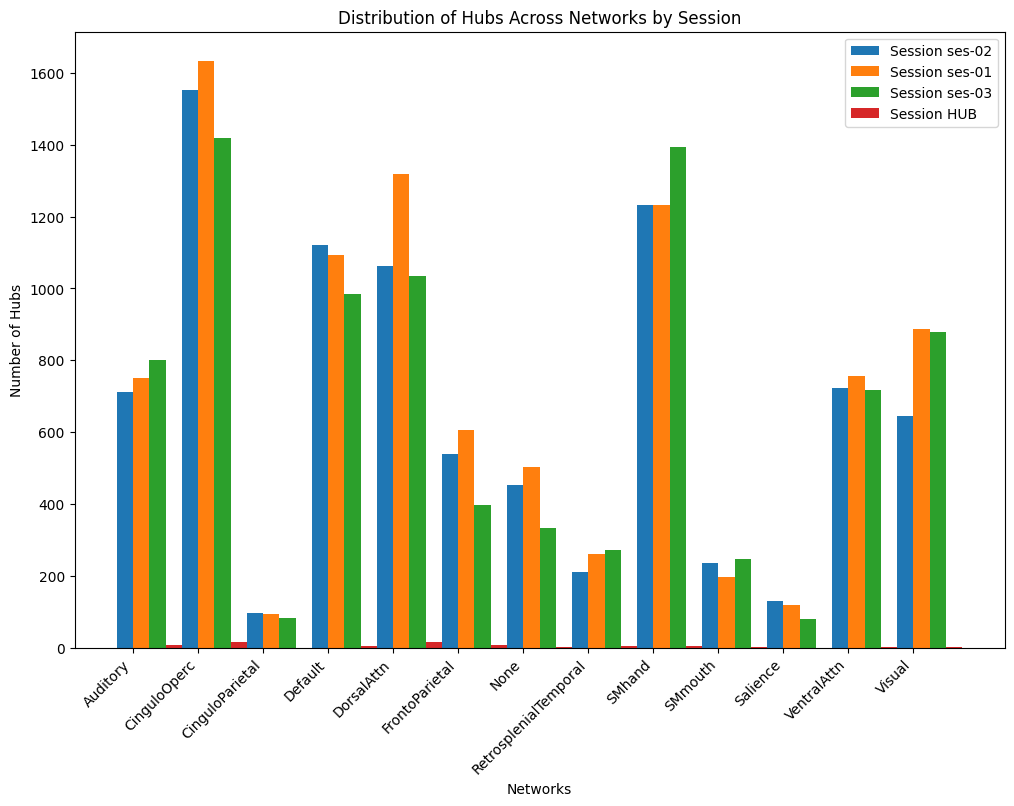

In [3]:

def plot_network_distribution_of_hubs(session_network_counts):
    fig, ax = plt.subplots(figsize=(12, 8))
    networks = sorted(set(network for session in session_network_counts.values() for network in session))
    ind = np.arange(len(networks))  # the x locations for the groups
    width = 0.25  # the width of the bars
    
    for i, (session, counts) in enumerate(session_network_counts.items()):
        frequencies = [counts.get(network, 0) for network in networks]
        ax.bar(ind + i * width, frequencies, width, label=f'Session {session}')
    
    ax.set_xlabel('Networks')
    ax.set_ylabel('Number of Hubs')
    ax.set_title('Distribution of Hubs Across Networks by Session')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(networks, rotation=45, ha="right")
    ax.legend()
    plt.show()

# Plot the network distribution of hubs
plot_network_distribution_of_hubs(session_network_counts)


In [ ]:

# Load hub indices from files
hub_files = {
    'ses-01': '/path/to/ses-01_hub_indices.txt',
    'ses-02': '/path/to/ses-02_hub_indices.txt',
    'ses-03': '/path/to/ses-03_hub_indices.txt'
}

session_hubs = {session: np.loadtxt(filepath, dtype=int) for session, filepath in hub_files.items()}

# Load correlation matrices and organize by session
folder_path = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/Gordon_atlas_results/final_csv_outputs'
file_pattern = '*.csv'
csv_files = glob.glob(os.path.join(folder_path, file_pattern))

correlation_matrices = {'ses-01': [], 'ses-02': [], 'ses-03': []}
for file_path in csv_files:
    session_key = os.path.basename(file_path).split('_')[1]  # Adjust index as needed if session key extraction differs
    matrix = np.loadtxt(file_path, delimiter=',')  # Adjust delimiter if necessary
    correlation_matrices[session_key].append(matrix)

# Example analysis: Calculate hub overlap consistency across sessions
def calculate_hub_overlap_consistency(session_hubs):
    overlap_consistency = {}
    sessions = list(session_hubs.keys())
    
    for i in range(len(sessions) - 1):
        overlap = np.intersect1d(session_hubs[sessions[i]], session_hubs[sessions[i + 1]])
        consistency_score = len(overlap) / min(len(session_hubs[sessions[i]]), len(session_hubs[sessions[i + 1]]))
        overlap_consistency[f'{sessions[i]}_to_{sessions[i+1]}'] = consistency_score
    
    return overlap_consistency

hub_overlap_consistency = calculate_hub_overlap_consistency(session_hubs)

# Visualizing the hub overlap consistency
plt.figure(figsize=(8, 6))
plt.bar(hub_overlap_consistency.keys(), hub_overlap_consistency.values(), color='skyblue')
plt.xlabel('Session Comparison')
plt.ylabel('Overlap Consistency')
plt.title('Hub Overlap Consistency Between Sessions')
plt.show()


In [4]:
import os
import numpy as np
import pandas as pd

# Define the directory containing the hub indices files
hub_directory = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/gordon_atlas_results/hub_profiles/final_hub_indices/*.txt'

# Initialize a list to store the data
data = []

# Iterate over each file in the directory
for file in glob.glob(hub_directory):
    # Extract the subject ID and session ID from the file name
    subject_id, session_id = os.path.basename(file).split('_')[:2]
    
    # Load the hub indices from the file
    hub_indices = np.loadtxt(file, dtype=int)
    
    # Append the data to the list
    data.append([subject_id, session_id, hub_indices])
    
# Create a DataFrame from the collected data
hub_indices_df = pd.DataFrame(data, columns=['SubjectID', 'SessionID', 'HubIndices'])

# Save the DataFrame to a CSV file
hub_indices_df.to_csv('hub_indices_data.csv', index=False)

# Display the DataFrame
print(hub_indices_df)


    SubjectID SessionID                                         HubIndices
0     sub-024    ses-02  [3, 5, 8, 10, 13, 14, 16, 17, 21, 22, 32, 33, ...
1     sub-135    ses-01  [13, 21, 22, 23, 24, 25, 29, 30, 40, 41, 48, 5...
2     sub-046    ses-01  [3, 13, 30, 34, 39, 41, 42, 48, 55, 60, 61, 62...
3     sub-019    ses-03  [2, 5, 8, 13, 15, 21, 22, 27, 28, 29, 35, 42, ...
4     sub-087    ses-01  [4, 5, 7, 9, 21, 22, 24, 25, 27, 37, 39, 51, 5...
..        ...       ...                                                ...
395   sub-030    ses-03  [4, 21, 29, 30, 37, 40, 41, 42, 44, 56, 57, 67...
396   sub-143    ses-03  [2, 5, 6, 21, 22, 23, 27, 30, 36, 38, 39, 40, ...
397   sub-084    ses-03  [1, 5, 6, 12, 14, 18, 20, 24, 25, 27, 28, 29, ...
398   sub-078    ses-02  [2, 4, 5, 6, 10, 21, 22, 26, 27, 28, 29, 30, 3...
399   sub-045    ses-03  [2, 13, 21, 22, 24, 25, 27, 29, 30, 31, 32, 34...

[400 rows x 3 columns]


In [5]:
import numpy as np
import pandas as pd
from itertools import combinations

# Assuming `hub_indices_df` contains columns: 'SubjectID', 'SessionID', 'HubIndices'
# Each `HubIndices` entry is a set of hub indices for that subject and session

def calculate_hub_overlap_consistency(hub_indices_df):
    overlap_results = []
    for subject_id, group in hub_indices_df.groupby('SubjectID'):
        sessions = group['SessionID'].unique()
        total_overlap = 0
        total_comparisons = 0
        
        for session1, session2 in combinations(sessions, 2):
            hubs1 = set(group[group['SessionID'] == session1]['HubIndices'].values[0])
            hubs2 = set(group[group['SessionID'] == session2]['HubIndices'].values[0])
            overlap = len(hubs1.intersection(hubs2)) / min(len(hubs1), len(hubs2))
            total_overlap += overlap
            total_comparisons += 1
        
        average_overlap = total_overlap / total_comparisons if total_comparisons > 0 else 0
        overlap_results.append({
            'SubjectID': subject_id,
            'AverageOverlapConsistency': average_overlap
        })
    
    return pd.DataFrame(overlap_results)

# Example usage


overlap_consistency_df = calculate_hub_overlap_consistency(hub_indices_df)
print(overlap_consistency_df)

    SubjectID  AverageOverlapConsistency
0     sub-001                   0.273632
1     sub-002                   0.333333
2     sub-003                   0.388060
3     sub-004                   0.353234
4     sub-005                   0.328358
..        ...                        ...
142   sub-147                   0.383085
143   sub-151                   0.323383
144   sub-152                   0.417910
145   sub-154                   0.328358
146   sub-155                   0.363184

[147 rows x 2 columns]


In [6]:
# Calculate overlapping hub indices across all sessions for each subject
def find_common_hubs_across_sessions(hub_indices_df):
    common_hubs_results = []
    for subject_id, group in hub_indices_df.groupby('SubjectID'):
        hub_lists = group['HubIndices'].tolist()
        common_hubs = set(hub_lists[0]).intersection(*hub_lists[1:])
        common_hubs_results.append({
            'SubjectID': subject_id,
            'CommonHubs': common_hubs,
            'NumCommonHubs': len(common_hubs)
        })
    
    return pd.DataFrame(common_hubs_results)

# Example usage
common_hubs_df = find_common_hubs_across_sessions(hub_indices_df)
print(common_hubs_df)

    SubjectID                                         CommonHubs  \
0     sub-001                             {34, 197, 39, 203, 63}   
1     sub-002      {65, 290, 37, 197, 105, 139, 51, 180, 22, 92}   
2     sub-003  {96, 160, 163, 40, 79, 48, 208, 50, 51, 180, 1...   
3     sub-004    {67, 5, 201, 141, 80, 180, 54, 214, 24, 57, 91}   
4     sub-005            {67, 37, 104, 75, 109, 111, 84, 85, 86}   
..        ...                                                ...   
142   sub-147  {162, 131, 73, 172, 13, 174, 143, 241, 52, 21,...   
143   sub-151                     {2, 6, 45, 48, 49, 21, 22, 91}   
144   sub-152  {22, 27, 159, 34, 36, 37, 40, 41, 48, 50, 57, ...   
145   sub-154                   {162, 75, 203, 80, 242, 87, 223}   
146   sub-155  {257, 259, 104, 265, 77, 209, 50, 180, 21, 91,...   

     NumCommonHubs  
0                5  
1               10  
2               15  
3               11  
4                9  
..             ...  
142             13  
143            

In [7]:
import os
import numpy as np
import pandas as pd
import glob

# Define the directory containing the hub indices files
hub_directory = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/gordon_atlas_results/hub_profiles/final_hub_indices/*.txt'

# Initialize a list to store the data
data = []
target_hubs = 67  # The target number of hubs

# Iterate over each file in the directory
for file in glob.glob(hub_directory):
    # Extract the subject ID and session ID from the file name
    subject_id, session_id = os.path.basename(file).split('_')[:2]
    
    # Load the hub indices from the file
    hub_indices = np.loadtxt(file, dtype=int)
    
    # Truncate or pad the hub indices to ensure the correct length
    if len(hub_indices) > target_hubs:
        hub_indices = hub_indices[:target_hubs]  # Truncate if more hubs
    elif len(hub_indices) < target_hubs:
        hub_indices = np.pad(hub_indices, (0, target_hubs - len(hub_indices)), constant_values=np.nan)  # Pad if fewer hubs
    
    # Append the data to the list
    data.append([subject_id, session_id] + list(hub_indices))
    
# Create a DataFrame from the collected data
hub_indices_df = pd.DataFrame(data, columns=['SubjectID', 'SessionID'] + [f'Hub_{i+1}' for i in range(target_hubs)])

# Save the DataFrame to a CSV file
hub_indices_df.to_csv('hub_indices_data.csv', index=False)

# Display the DataFrame
print(hub_indices_df.head())

  SubjectID SessionID  Hub_1  Hub_2  Hub_3  Hub_4  Hub_5  Hub_6  Hub_7  Hub_8  \
0   sub-024    ses-02      3      5      8     10     13     14     16     17   
1   sub-135    ses-01     13     21     22     23     24     25     29     30   
2   sub-046    ses-01      3     13     30     34     39     41     42     48   
3   sub-019    ses-03      2      5      8     13     15     21     22     27   
4   sub-087    ses-01      4      5      7      9     21     22     24     25   

   ...  Hub_58  Hub_59  Hub_60  Hub_61  Hub_62  Hub_63  Hub_64  Hub_65  \
0  ...     224     225     226     227     229     231     232     255   
1  ...     245     250     252     253     258     259     262     263   
2  ...     236     244     250     258     266     268     269     276   
3  ...     248     251     252     255     258     263     278     289   
4  ...     228     230     236     243     246     250     252     265   

   Hub_66  Hub_67  
0     267     292  
1     265     272  
2     29

In [36]:
# Calculate the frequency of each hub across sessions for each subject
hub_stability_df = hub_indices_df.groupby('SubjectID').agg(lambda x: x.nunique())

# Calculate a stability score for each hub
# For simplicity, let's say the stability score is the number of sessions in which a hub appears
hub_stability_df['Stability_Score'] = hub_stability_df.sum(axis=1)

# Save the stability scores to a CSV file
hub_stability_df.to_csv('hub_stability_scores.csv', index=True)

# Display the stability scores DataFrame
print(hub_stability_df.head())

           SessionID  Hub_1  Hub_2  Hub_3  Hub_4  Hub_5  Hub_6  Hub_7  Hub_8  \
SubjectID                                                                      
sub-001            3      3      3      3      3      3      3      3      3   
sub-002            3      3      3      3      3      3      3      3      3   
sub-003            3      2      3      3      3      3      3      3      3   
sub-004            3      3      2      3      3      3      3      3      3   
sub-005            3      3      3      3      3      3      3      3      3   

           Hub_9  ...  Hub_59  Hub_60  Hub_61  Hub_62  Hub_63  Hub_64  Hub_65  \
SubjectID         ...                                                           
sub-001        3  ...       3       3       3       3       3       3       3   
sub-002        3  ...       3       3       3       3       3       3       3   
sub-003        3  ...       3       3       3       2       3       3       3   
sub-004        3  ...       3     

In [50]:
import pandas as pd

# Melt the DataFrame to long format
hub_stability_long = hub_indices_df.melt(id_vars=['SubjectID', 'SessionID'], 
                                           value_vars=[col for col in hub_stability_df.columns if 'Hub_' in col], 
                                           var_name='Hub', 
                                           value_name='Stability_Score')

In [51]:
# Count the number of unique sessions per subject
subject_session_counts = hub_stability_long.groupby('SubjectID')['SessionID'].nunique()

# Filter out subjects who don't have data for all sessions
subjects_with_all_sessions = subject_session_counts[subject_session_counts == hub_stability_long['SessionID'].nunique()].index
filtered_df = hub_stability_long[hub_stability_long['SubjectID'].isin(subjects_with_all_sessions)]

In [52]:
# Count the number of unique sessions per subject
subject_session_counts = hub_stability_long.groupby('SubjectID')['SessionID'].nunique()

# Filter out subjects who don't have data for all sessions
subjects_with_all_sessions = subject_session_counts[subject_session_counts == hub_stability_long['SessionID'].nunique()].index
filtered_df = hub_stability_long[hub_stability_long['SubjectID'].isin(subjects_with_all_sessions)]

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Define the model
# Here 'Stability_Score' is the dependent variable
# 'SessionID' is treated as a fixed effect, and 'SubjectID' as a random effect
model = mixedlm("Stability_Score ~ SessionID", data=filtered_df, groups=filtered_df["SubjectID"])

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Stability_Score
No. Observations:    22914    Method:              REML           
No. Groups:          114      Scale:               6652.1767      
Min. group size:     201      Log-Likelihood:      -133399.1971   
Max. group size:     201      Converged:           Yes            
Mean group size:     201.0                                        
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept           128.177    1.068 119.994 0.000 126.083 130.271
SessionID[T.ses-02]  -1.208    1.320  -0.915 0.360  -3.795   1.379
SessionID[T.ses-03]  -1.065    1.320  -0.807 0.419  -3.652   1.521
Group Var            30.792    0.104                              



/var/folders/pk/_05twpvj24j0qzvswx59ytfr0000gq/T/ipykernel_54388/3368457882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='SessionID', y='Stability_Score', palette="Set3")


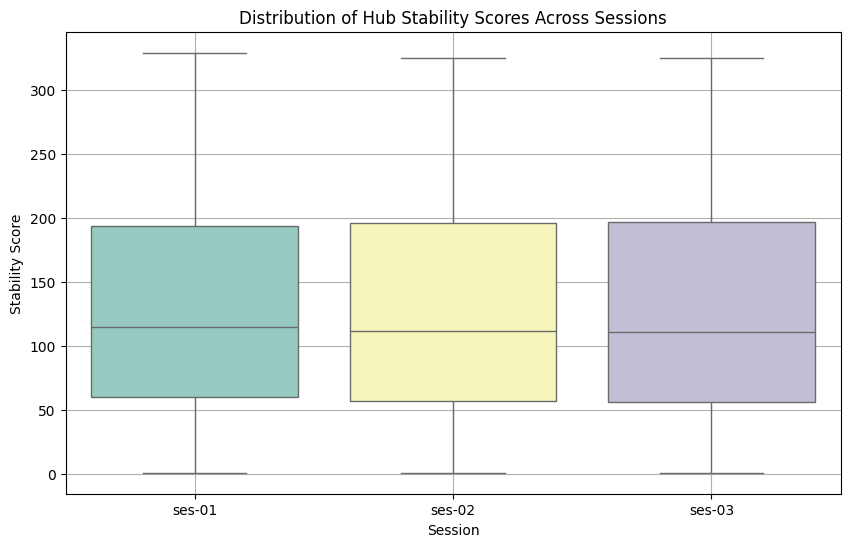

In [57]:
# Box plot to visualize the distribution of stability scores across sessions
plt.figure(figsize=(10, 6))

sns.boxplot(data=filtered_df, x='SessionID', y='Stability_Score', palette="Set3")

plt.title('Distribution of Hub Stability Scores Across Sessions')
plt.xlabel('Session')
plt.ylabel('Stability Score')
plt.grid(True)
plt.show()